# Model objective

## This dataset contains an airline passenger satisfaction survey. We have to prepare a classification model to predict the satisfaction of customers based on input features

## 1 Import preliminary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Load the dataset

In [4]:
df = pd.read_csv("Airport_Passengers_Satisfication.csv")

In [6]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 2.2 Attribute information

**Gender: Gender of the passengers (Female, Male)**
**
Customer Type: The customer type (Loyal customer, disloyal custome**r)**

Age: The actual age of the passen**

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)**

Flight distance: The flight distance of this jou**rn**ey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicabl**e;**1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time co**nv**enient

Ease of Online booking: Satisfaction level of onli**ne** booking

Gate location: Satisfaction level of G**at**e location

Food and drink: Satisfaction level of **Fo**od and drink

Online boarding: Satisfaction level of** o**nline boarding

Seat comfort: Satisfaction lev**el** of Seat comfort

Inflight entertainment: Satisfaction level of in**fl**ight entertainment

On-board service: Satisfaction lev**el** of On-board service

Leg room service: Satisfaction l**ev**el of Leg room service

Baggage handling: Satisfaction** l**evel of baggage handling

Check-in service: Satisfacti**on** level of Check-in service

Inflight service: Satisfac**ti**on level of inflight service

Cleanliness: S**at**isfaction level of Cleanliness

Departure Delay in Minut**es**: Minutes delayed when departure

Arrival Delay in M**in**utes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Sat**isfaction, neutral or dissatisfaction)gers

### 2.3 General observation 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

### 2.4 Null Values

In [11]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

**Since the null values are negligible we can drop them**

In [13]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

0

### 2.5 Duplicate values

In [17]:
df.duplicated().sum()

0

### 2.6 Statistical Summary

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25893.0,65021.974858,37606.098635,17.0,32209.0,65344.0,97623.0,129877.0
Age,25893.0,39.621983,15.134224,7.0,27.0,40.0,51.0,85.0
Flight Distance,25893.0,1193.753254,998.626779,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25893.0,2.723709,1.334711,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25893.0,3.046422,1.532971,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25893.0,2.755996,1.412552,0.0,2.0,3.0,4.0,5.0
Gate location,25893.0,2.976442,1.281661,1.0,2.0,3.0,4.0,5.0
Food and drink,25893.0,3.214923,1.331895,0.0,2.0,3.0,4.0,5.0
Online boarding,25893.0,3.261615,1.355505,0.0,2.0,4.0,4.0,5.0
Seat comfort,25893.0,3.448886,1.320254,1.0,2.0,4.0,5.0,5.0


### 2.7 Dropping the "ID" column

**The 'id' column is of no consequence in model prediction. Hence, it can be dropped**

In [22]:
df.drop("id", axis=1, inplace=True)

In [24]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 2.8 Renaming the Columns

**Some columns have spaces between words. We will eliminate the spaces and convert all the columns into small letters for ease of working**

In [26]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [28]:
df.rename(columns = {"Gender": "gender",
                    "Customer Type": "customer_type",
                    "Age": "age",
                    "Type of Travel": "type_of_travel",
                    "Class": "class",
                    "Flight Distance": "flight_distance",
                    "Inflight wifi service": "inflight_wifi_service",
                    "Departure/Arrival time convenient": "departure_or_arrival_time_convenient",
                    "Ease of Online booking": "ease_of_online_booking",
                    "Gate location": "gate_location",
                    "Food and drink": "food_and_drink",
                    "Online boarding": "online_boarding",
                    "Seat Comfort": "seat_comfort",
                    "Baggage handling": "baggage_handling",
                    "Checkin service": "checkin_service",
                    "Inflight service": "inflight_service",
                    "Cleanliness": "cleanliness",
                    "Departure Delay in Minutes": "departure_delay_in_minutes",
                    "Arrival Delay in Minutes": "arrival_delay_in_minutes"}, inplace=True)

In [30]:
df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_or_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [248]:
df.rename(columns = {"Inflight entertainment": "inflight_entertainment",
                    "On-board service": "on_board_service",
                    "Leg room service": "leg_room_service"}, inplace=True)

In [29]:
df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_or_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'Seat comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [32]:
for column in df:
    print(f"{column} - ({len(df[column].unique())} : {df[column].unique()})")

gender - (2 : ['Female' 'Male'])
customer_type - (2 : ['Loyal Customer' 'disloyal Customer'])
age - (75 : [52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85])
type_of_travel - (2 : ['Business travel' 'Personal Travel'])
class - (3 : ['Eco' 'Business' 'Eco Plus'])
flight_distance - (3279 : [ 160 2863  192 ... 3714 3097 3518])
inflight_wifi_service - (6 : [5 1 2 0 3 4])
departure_or_arrival_time_convenient - (6 : [4 1 0 3 5 2])
ease_of_online_booking - (6 : [3 2 0 4 5 1])
gate_location - (5 : [4 1 2 3 5])
food_and_drink - (6 : [3 5 2 4 1 0])
online_boarding - (6 : [4 2 1 5 3 0])
Seat comfort - (5 : [3 5 2 4 1])
Inflight entertainment - (6 : [5 4 2 1 3 0])
On-board service - (6 : [5 4 1 2 3 0])
Leg room service - (6 : [5 4 1 2 3 0])
baggage_handling - (5 : [5 4 3 1 2])
checkin_service - (5 : [2 3 4 1 5])
inflight_

## 3. Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()
mapping = []
for col in df.columns:
    if df[col].dtype == "object":
        df[col]=encoder.fit_transform(df[col])
        mapping.append(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))  

In [38]:
mapping

[{'Female': 0, 'Male': 1},
 {'Loyal Customer': 0, 'disloyal Customer': 1},
 {'Business travel': 0, 'Personal Travel': 1},
 {'Business': 0, 'Eco': 1, 'Eco Plus': 2},
 {'dissatisfied': 0, 'satisfied': 1}]

### 3. Train, Test, Split

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X=df.drop("satisfaction", axis=1)

In [44]:
y=df["satisfaction"]

In [46]:
y.unique()

array([1, 0])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 4. Implementing the model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
clf_rfc = classification_report(y_test, y_pred_rfc)

print(f"Confusion Matrix: \n {cm_rfc}")
print(f"classification report: \n {clf_rfc}")

Confusion Matrix: 
 [[2805   85]
 [ 151 2138]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2890
           1       0.96      0.93      0.95      2289

    accuracy                           0.95      5179
   macro avg       0.96      0.95      0.95      5179
weighted avg       0.95      0.95      0.95      5179



### Our model performs exceedingly well. It has an overall accuracy of 95% and it performs equally well on both the classes

### Assignment questions

**16) Use the Airport_Passengers_Satisfication.csv data for the following questions, Don’t perform any Data cleaning or pre-processing before answering the question. What percentage of Female passengers are dissatisfied?**

**A. 49%**
**B. 56%**
**C. 44%**
**D. 31%**

In [57]:
df = pd.read_csv("Airport_Passengers_Satisfication.csv")

In [63]:
df = df.drop("id", axis=1)

In [65]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [69]:
df.rename(columns = {"Gender": "gender",
                    "Customer Type": "customer_type",
                    "Age": "age",
                    "Type of Travel": "type_of_travel",
                    "Class": "class",
                    "Flight Distance": "flight_distance",
                    "Inflight wifi service": "inflight_wifi_service",
                    "Departure/Arrival time convenient": "departure_or_arrival_time_convenient",
                    "Ease of Online booking": "ease_of_online_booking",
                    "Gate location": "gate_location",
                    "Food and drink": "food_and_drink",
                    "Online boarding": "online_boarding",
                    "Seat Comfort": "seat_comfort",
                    "Baggage handling": "baggage_handling",
                    "Checkin service": "checkin_service",
                    "Inflight service": "inflight_service",
                    "Cleanliness": "cleanliness",
                    "Departure Delay in Minutes": "departure_delay_in_minutes",
                    "Arrival Delay in Minutes": "arrival_delay_in_minutes",
                    "Inflight entertainment": "inflight_entertainment",
                    "On-board service": "on_board_service",
                    "Leg room service": "leg_room_service"}, inplace=True)

In [71]:
df["gender"].value_counts()

gender
Female    13172
Male      12804
Name: count, dtype: int64

In [75]:
df["gender"][(df["gender"]=="Female") & (df["satisfaction"]=="dissatisfied")].count()

7437

In [77]:
#Percentage of dissatisfied women:
7417/13127

0.5650186638226556

**Answer is: B.56%**

**18) Use the Airport_Passengers_Satisfication.csv data for the following questions, Don’t perform any Data cleaning or pre-processing before answering the question. Build a basic random forest model with test_size=0.3, random_state=24 (parameter for both train_test_split and model initialization), n_estimators=200 with the 14 rating columns as independent variable and satisfaction column as dependent variable, what is the accuracy score of the model?**

**A. 0.98**
**B. 0.93**
**C. 0.95**
**D. 0.89**

In [92]:
req_cols=[]
for col in df.columns:
    if df[col].dtype != "object":
        req_cols.append(col)
        # selected_columns = df.loc[:, df.apply(lambda x: x.between(0, 5).all())]

In [94]:
req_cols

['age',
 'flight_distance',
 'inflight_wifi_service',
 'departure_or_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'Seat comfort',
 'inflight_entertainment',
 'on_board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes']

In [96]:
req_cols=req_cols[2:16]

In [98]:
req_cols

['inflight_wifi_service',
 'departure_or_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'Seat comfort',
 'inflight_entertainment',
 'on_board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness']

In [100]:
df1 = df[req_cols]

In [102]:
df1.head()

,inflight_wifi_service,departure_or_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,Seat comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [104]:
df1.shape

(25976, 14)

In [106]:
df1["satisfaction"] = df["satisfaction"]

C:\Users\admin\AppData\Local\Temp\ipykernel_11540\208495459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["satisfaction"] = df["satisfaction"]


In [108]:
df1.shape

(25976, 15)

In [110]:
df1["satisfaction"].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [112]:
df1["satisfaction"].replace(["dissatisfied", "satisfied"], [0,1], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11540\2920143061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["satisfaction"].replace(["dissatisfied", "satisfied"], [0,1], inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11540\2920143061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [114]:
df1["satisfaction"].unique()

array([1, 0], dtype=int64)

In [116]:
X = df1.iloc[:, :-1]
y= df["satisfaction"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [120]:
X_train.shape

(18183, 14)

In [122]:
y_train.shape

(18183,)

In [124]:
rfc_df1 = RandomForestClassifier(n_estimators=200, random_state=24)
rfc_df1.fit(X_train, y_train)
y_pred = rfc_df1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.9358398562812781


**Answer is: B. 0.93**

**19) Use the Airport_Passengers_Satisfication.csv data for the following questions, Don’t perform any Data cleaning or pre-processing before answering the question. Build a basic random forest model in the original data set with test_size=0.3, random_state=12 (parameter for both train_test_split and model initialization) and, n_estimators=500, criterion='entropy' after performing below steps.**

**In satisfaction column, convert satisfied to 1 and dissatisfied to 0**

**Drop columns ‘id’ and 'Arrival Delay in Minutes'**

**Apply pandas get_dummies in the remaining columns.**

**What is the f1 score of the model?**

**A. 0.95**
**B. 0.90**
**C. 0.98**
**D. 0.93**

In [131]:
df.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_or_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [133]:
# We have already dropped "id" column in the earlier question
df.drop(["arrival_delay_in_minutes"], axis=1, inplace=True)

In [135]:
df.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_or_arrival_time_convenient,ease_of_online_booking,gate_location,...,Seat comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,satisfied


In [137]:
df["satisfaction"].replace(["dissatisfied", "satisfied"], [0,1], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11540\3385176586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["satisfaction"].replace(["dissatisfied", "satisfied"], [0,1], inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11540\3385176586.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [139]:
df["satisfaction"].unique()

array([1, 0], dtype=int64)

In [141]:
X = df.iloc[:, :-1]
y = df["satisfaction"]

In [143]:
X.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_or_arrival_time_convenient,ease_of_online_booking,gate_location,...,online_boarding,Seat comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,4,3,5,5,5,5,2,5,5,50
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,5,4,4,4,4,3,4,5,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,2,4,1,3,2,2,2,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,4,1,1,1,1,3,1,4,0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,1,2,2,2,2,2,4,2,4,0


In [145]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

In [147]:
X = pd.get_dummies(X)

In [149]:
X.head()

,age,flight_distance,inflight_wifi_service,departure_or_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,Seat comfort,inflight_entertainment,...,departure_delay_in_minutes,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,50,True,False,True,False,True,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,0,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,0,False,True,True,False,True,False,True,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,0,True,False,True,False,True,False,False,True,False


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [153]:
X_train.shape

(18183, 26)

In [155]:
X_test.shape

(7793, 26)

In [157]:
y_train.shape

(18183,)

In [159]:
rfc_500 = RandomForestClassifier(n_estimators=500, criterion="entropy", random_state=12)
rfc_500.fit(X_train,y_train)
y_pred = rfc_500.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print("classification report: ", clf_report)

classification report:                precision    recall  f1-score   support

           0       0.95      0.97      0.96      4397
           1       0.96      0.94      0.95      3396

    accuracy                           0.96      7793
   macro avg       0.96      0.96      0.96      7793
weighted avg       0.96      0.96      0.96      7793



In [161]:
print("classification report: \n", clf_report)

classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4397
           1       0.96      0.94      0.95      3396

    accuracy                           0.96      7793
   macro avg       0.96      0.96      0.96      7793
weighted avg       0.96      0.96      0.96      7793



**Answer is A. 0.95**

**20) Use the Airport_Passengers_Satisfication.csv data for the following questions, Don’t perform any Data cleaning or pre-processing before answering the question. Whether we can use the Random Forest method if the target variable is continuous?**

**A. No, we can’t use continuous target variables.**

**B. Change the continuous target variable to categories and apply Random Forest**

**C, Yes, we can use it for continuous target variables.**

**D. None of the options is correct**

- **Since the question is specific to this particular dataset, we cannot use continuous target varaibles**

- **Hence, the answer is A. No, we can't use continuous target variables**

- **It is to be noted that random forest can be applied to both the classification as well as the regression problems. However, in the above question we are asked about this specific dataset. Hence, the answer is A**

**21) Consider we are building One Random forest with 100 trees, please choose the correct option w.r.t the process it follows?**

**A. Random columns and Random records for each tree, Build trees in parallel.**

**B. Random columns and All records for each tree, Build trees in series.**

**C. Random columns and Random records for each tree, Build trees in series.**

**D. All columns and Random records for each tree, Build trees in parallel.**

**Answer is A.**

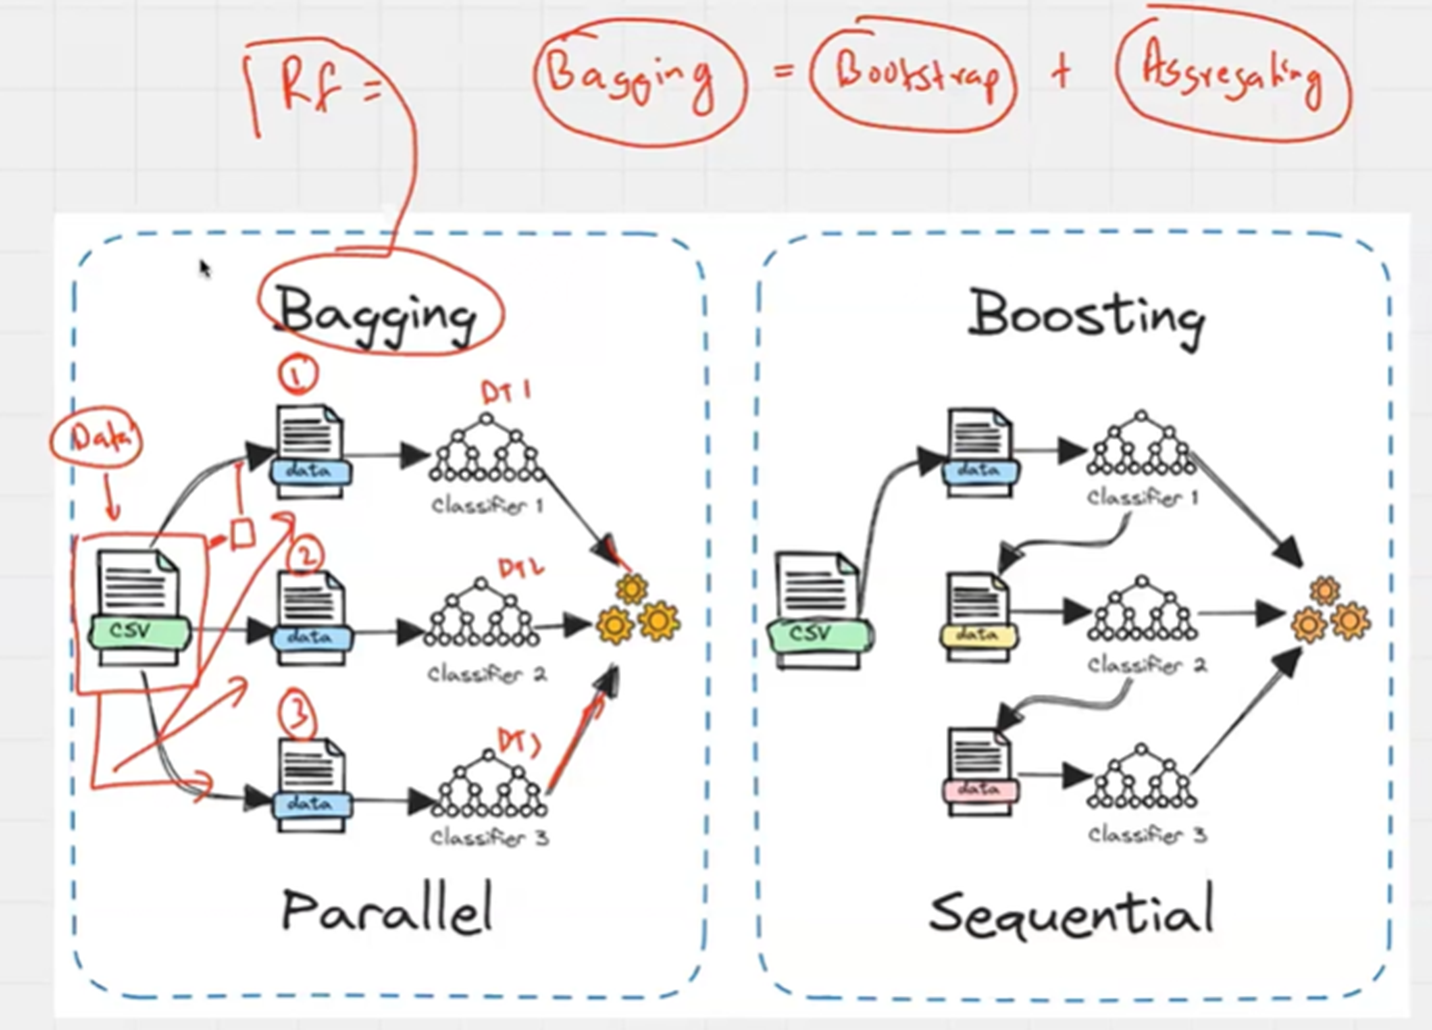

- **The above image explains the bagging process in random forest. Trees are formed parallelly as opposed to sequentially in boosting**

**22) Which of the following is NOT a hyperparameter in Random Forest?**

**A. Learning rate**

**B. Maximum depth of each tree**

**C. Number of trees**

**D. Number of features to consider at each split**

**Answer is A**

- **max_depth let's us define the maximum depth of each tree**

- **n_estimators let's us define the number of trees**

- **max_features let's us define the number of trees to consider at each split**